# Baby Steps of Machine Learning

機械学習モデルを作成する基本的な手順を、ここで確認し行きます。今回は手書き文字の認識を行うモデルの作成を通じて、この手順の解説を行っていきます。

* [データロード](#Load-the-Data)
* [データの前処理](#Data-Preprocessing)
* [モデル構築](#Create-the-Model)
* [学習](#Training-the-Model)
* [評価](#Evaluate-the-Model)
* [保存](#Store-the-Model)

手順を進めていくにあたっては、[scikit-learn](http://scikit-learn.org/)という機械学習モデルを作るためのライブラリを使います。


In [1]:
# グラフが文章中に表示されるようにするおまじない
%matplotlib inline

## Load the Data

機械学習は、データからルールを学習する技術です。

![machine_learning.PNG](./pictures/machine_learning.PNG)

そのため、まず第一にデータを用意する必要があります。幸い、scikit-learnには、最初から手書きの数字を認識するための学習データ(手書き数字の画像データと、その画像の数字が0～9の何れであるかという答えのセット)が搭載されているため、それを利用します。

In [2]:
from sklearn import datasets


def load_data():
    dataset = datasets.load_digits()
    return dataset

digits = load_data()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


`digits.data.shape`で、データの行数、列数を表示しています。`1797`は行数、`64`は列数になりますです。これは、1797件の、64の特徴を持つデータであるということを意味しています。手書き文字の画像データは8×8のサイズであり、従ってその中のピクセルの数は64となるため特徴の数が64となっています(なお、RGB画像の場合はR、G、Bそれそれ64個あるため3倍になります)。  
これに対し、`digits.target.shape`はそのデータが実際にどの数字なのかの情報になります。つまり、教師データということです。  
実際に、データのうちの一つを表示してみます。

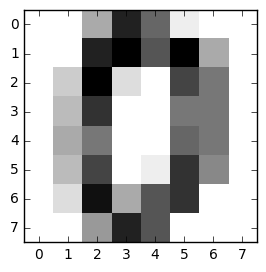

0


In [3]:
import numpy as np
import matplotlib.pyplot as plt    


def show_image(data):
    plt.figure(1, figsize=(3, 3))
    size = int(np.sqrt(len(data)))
    plt.imshow(np.reshape(data, (size, size)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_image(digits.data[0])
print(digits.target[0])

`digits.data[0]`には"0"の画像データが収められており、`digits.target[0]`にはその答えである`0`が収められているのがわかるかと思います。

## Data Preprocessing

In [4]:
print("write your code here")
normalized_data = digits.data

write your code here


## Create the Model

今回扱うのは画像の分類問題になります。分類に使えるモデルは沢山ありますが、今回は最もシンプルな線形分類機であるSGDClassifierを利用します。

In [5]:
def make_model():
    from sklearn.linear_model import SGDClassifier    
    clf = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
    return clf
    
classifier = make_model()

本稿では各モデルの詳しい説明が目的ではないので、ここでは「分類に使える何かのモデル(=数式)を作った」というぐらいの感覚でかまいません。scikit-learnでは、上記のように様々なモデルを簡単に作ることができます。

## Train the Model

ここで、データとモデルがそろったため、学習させてみます。

In [6]:
print("write your code here")
train_d = test_d = normalized_data
train_t = test_t = digits.target

write your code here


In [7]:
classifier.fit(train_d, train_t)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

## Evaluate the Model

学習させたモデルの精度を計測してみます。`predict`で予測させることができるので、これで予測させた値と実際の答え(`digits.target`)を比べてみます。

In [8]:
from sklearn import metrics


predicted = classifier.predict(test_d)
score = metrics.accuracy_score(test_t, predicted)
print(score)

0.970506399555


## Store the Model

最後に、学習させたモデルを保存します。アプリケーション側で、その結果を確認してみてください。

In [9]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine.pkl") 

['./machine.pkl']